In [ ]:
from tensorflow.keras.datasets import cifar10


In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [ ]:
print("Training data shape:", train_images.shape, train_labels.shape)
print("Testing data shape:", test_images.shape, test_labels.shape)


Training data shape: (50000, 32, 32, 3) (50000, 1)
Testing data shape: (10000, 32, 32, 3) (10000, 1)


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
print("Train images min/max:", train_images.min(), train_images.max())
print("Test images min/max:", test_images.min(), test_images.max())

Train images min/max: 0.0 1.0
Test images min/max: 0.0 1.0


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
def plot_sample_images(images, labels, rows, cols):
    plt.figure(figsize=(10, 10))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(f"Label: {labels[i][0]}")
    plt.tight_layout()
    plt.show()


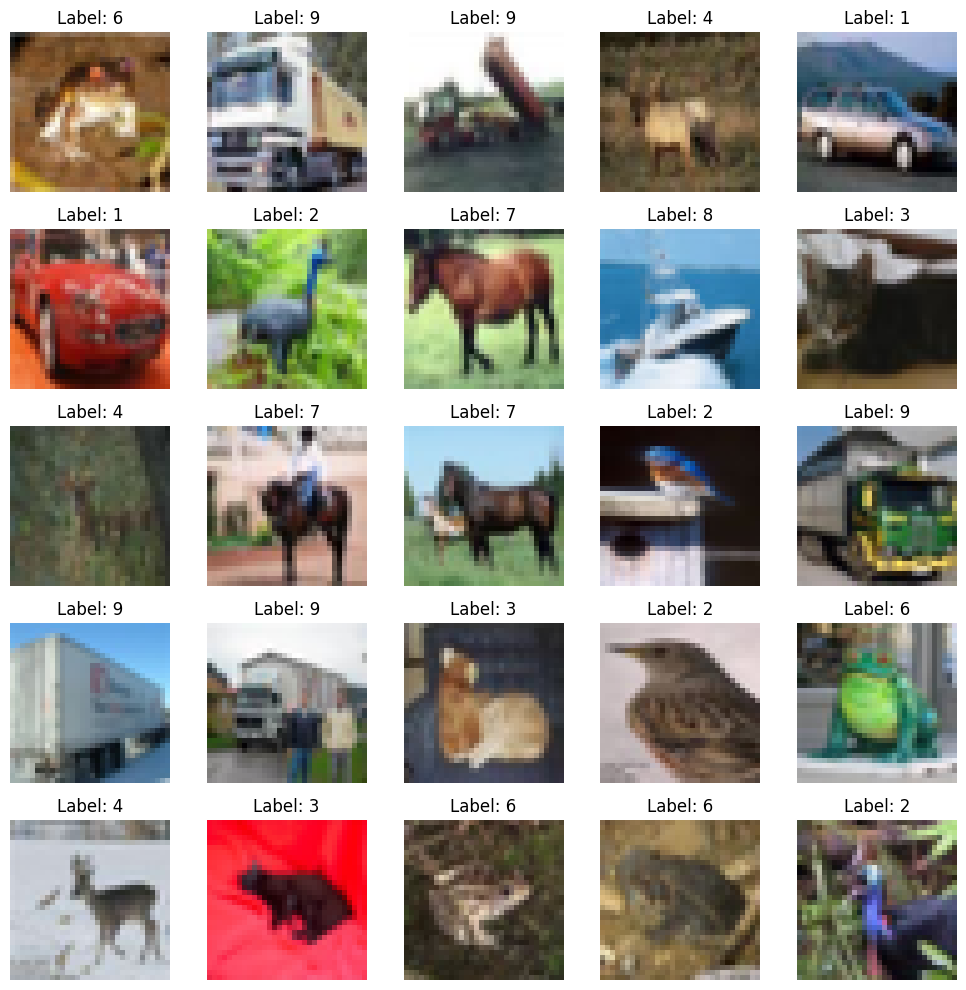

In [16]:
plot_sample_images(train_images, train_labels, rows=5, cols=5)


In [17]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


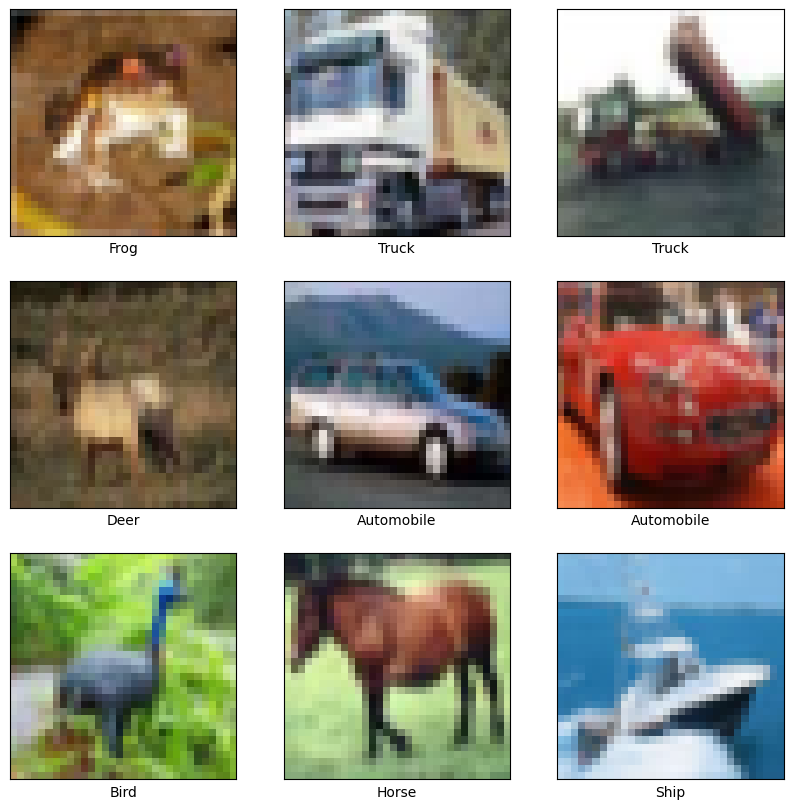

In [18]:
plt.figure(figsize=(10, 10))
rows, cols = 3, 3  # Customize grid size
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(train_images[i])
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False)  # Disable grid
    plt.xlabel(class_names[train_labels[i][0]])  # Add label below the image
plt.show()  # Display the plot


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()


In [21]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.layers import Flatten
model.add(Flatten())


In [25]:
from tensorflow.keras.layers import Dense
model.add(Dense(units=64, activation='relu'))


In [26]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,843,264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,160 (7.03 MB)

 Trainable params: 1,844,160 (7.03 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.add(Dense(units=10))
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [29]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,843,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,844,920 (7.04 MB)

 Trainable params: 1,844,920 (7.04 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(test_images, test_labels)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.2692 - loss: 1.9855 - val_accuracy: 0.3831 - val_loss: 1.6092
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.4530 - loss: 1.4808 - val_accuracy: 0.5093 - val_loss: 1.3489
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.5311 - loss: 1.2886 - val_accuracy: 0.5277 - val_loss: 1.3123
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.5611 - loss: 1.2072 - val_accuracy: 0.5373 - val_loss: 1.2678
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.5856 - loss: 1.1341 - val_accuracy: 0.5580 - val_loss: 1.2242
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 39ms/step - accuracy: 0.6086 - loss: 1.0778 - val_accuracy: 0.5575 - val_loss: 1.2255
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.6274 - loss: 1.0256 - val_accuracy: 0.5450 - val_loss: 1.2990
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6447 -

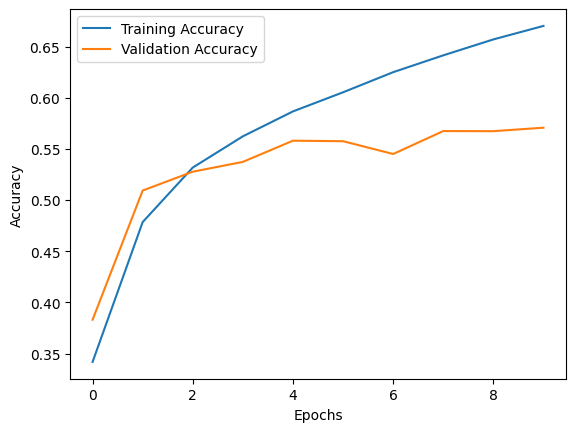

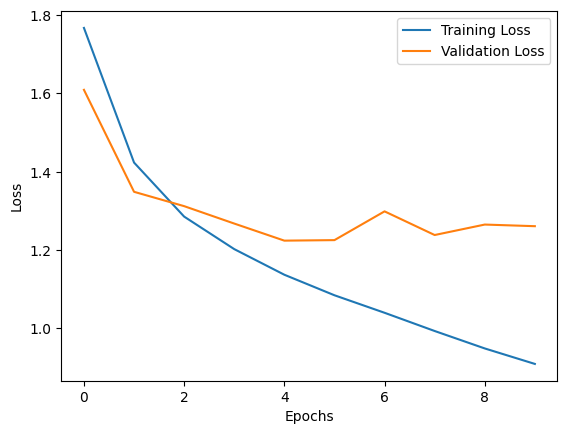

In [31]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


Text(0, 0.5, 'Accuracy')

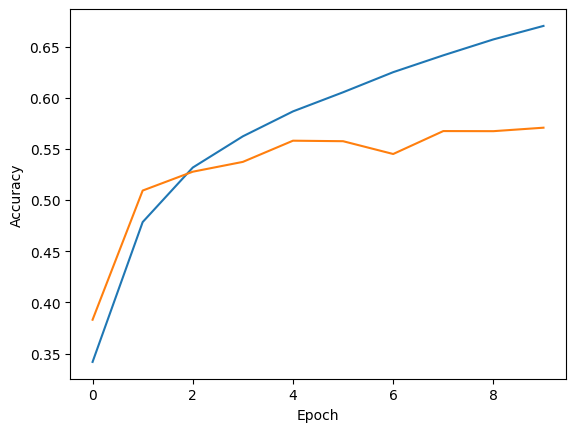

In [33]:
import matplotlib.pyplot as plt

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


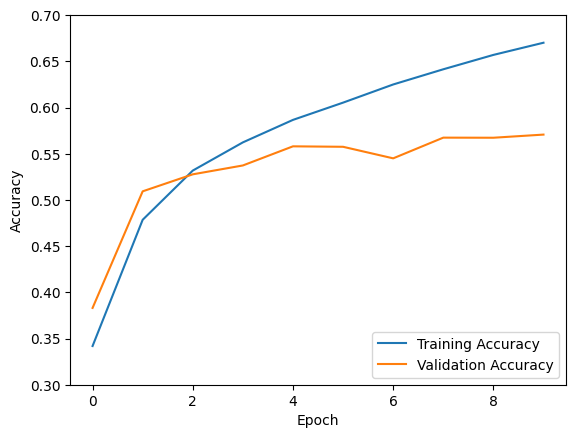

In [39]:
# # plt.ylim([0.5, 1])
# plt.legend(loc='lower right')
# plt.show()

import matplotlib.pyplot as plt

# Extract accuracy data
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

# Label the axes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Set y-axis limits based on the observed range in the graph
plt.ylim([0.3, 0.7])

# Add a legend in the lower-right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()



In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)


313/313 - 3s - 8ms/step - accuracy: 0.5707 - loss: 1.2611


In [41]:
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Test Loss: 1.2611173391342163
Test Accuracy: 0.5706999897956848
